In [68]:
import xarray as xr
import os
import fsspec
import matplotlib.pyplot as plt


In [2]:
path = '/work/users/my982hzao/'

In [5]:
ds = xr.open_zarr(fsspec.get_mapper(path + 'S2_Frankenwald.zarr'), \
                  consolidated=True)

In [11]:
NDVI = (ds.sel(band=8) - ds.sel(band=4)) / (ds.sel(band=8) + ds.sel(band=4))

In [15]:
NDVI

<xarray.Dataset>
Dimensions:  (lat: 7530, lon: 11540, time: 72)
Coordinates:
  * lat      (lat) float64 50.97 50.97 50.97 50.97 ... 50.31 50.31 50.31 50.31
  * lon      (lon) float64 10.29 10.29 10.29 10.29 ... 11.96 11.96 11.96 11.96
  * time     (time) datetime64[ns] 2017-01-31 2017-02-28 ... 2022-12-31
Data variables:
    mask     (time, lat, lon) float64 dask.array<chunksize=(1, 942, 1443), meta=np.ndarray>
    refl     (time, lat, lon) float64 dask.array<chunksize=(1, 471, 1443), meta=np.ndarray>

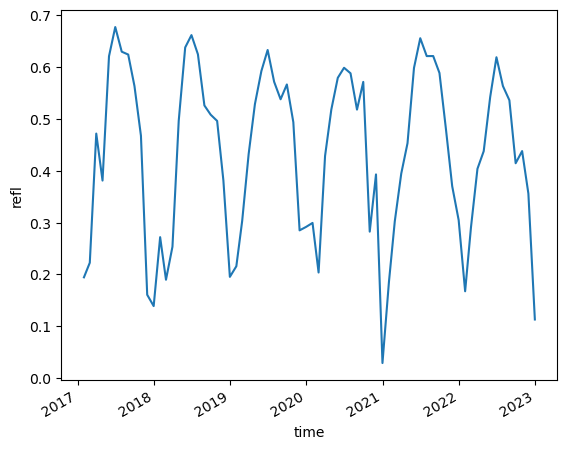

In [16]:
NDVI.refl.mean(dim=['lat', 'lon']).plot()

### Barren Soil Index (BSI)

The BSI is an index that indecates bare soil. Seems to work; ref: `https://github.com/sentinel-hub/custom-scripts/tree/master/sentinel-2/barren_soil`
\begin{align}
BSI = \frac{(B_{11} + B_4) - (B_8 + B_2)}{(B_{11} + B_4) + (B_8 + B_2)}
\end{align}

In [19]:
BSI = ((ds.sel(band=11) + ds.sel(band=4)) - (ds.sel(band=8) + ds.sel(band=2))) / ((ds.sel(band=11) + ds.sel(band=4)) + (ds.sel(band=8) + ds.sel(band=2)))

In [20]:
BSI.refl.mean(dim=['lat', 'lon']).plot()

### Selecting my hometown area...

In [56]:
NDVI_home = NDVI.sel(lon=slice(11.2, 11.4), lat=slice(50.41, 50.31)).refl
BSI_home = BSI.sel(lon=slice(11.2, 11.4), lat=slice(50.41, 50.31)).refl

In [71]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 5), sharex=True)

NDVI_home.resample(time='3M').mean().mean(dim=['lat', 'lon']).plot(ax=ax1, marker='o', linestyle='--', color='g')
BSI_home.resample(time='3M').mean().mean(dim=['lat', 'lon']).plot(ax=ax2, marker='o', linestyle='--', color = 'brown')
ax1.set_ylabel('NDVI')
ax2.set_ylabel('BSI')
plt.show()

### And some Heatmaps of the BSI for the selected region, seems all quite promising. 

It should be noted that so far the high resolution isn't really utilized. Looking forward to acutally applying a Forestmask and seeing the NDVI changes in the Forest. 

In [61]:
BSI_home_quarterly = BSI_home.resample(time='3M').mean()

In [72]:
fig, axs = plt.subplots(6, 4, figsize=(20, 20))

for i, ax in zip(range(24), axs.flatten()):
    BSI_home_quarterly.isel(time=i).plot(ax=ax, cmap='viridis', vmin=-0.8, vmax=-0.4)
plt.tight_layout()